# Введение

Настоящее исследование посвящено комплексному анализу данных о **совместном использовании велосипедов** в Лондоне.

Основная **цель** работы заключается в выявлении и количественной оценке влияния различных факторов, таких как погодные условия (температура, скорость ветра, влажность) и сезонные особенности, на спрос на сервис аренды велосипедов. Для достижения этой цели исследование опирается на два основных направления анализа: **статистическое исследование распределений признаков** с последующим тестированием гипотез по различиям между группами и **построение модели линейной регрессии** методом наименьших квадратов.

1. Первоначальный этап исследования включает анализ распределений ключевых переменных. С помощью визуальных инструментов, таких как плотностные графики, а также статистических методов, проводится сравнительный анализ распределений признаков по сезонам. В рамках этого этапа формулируются и тестируются гипотезы, касающиеся различий между сегментами. Если оказывается, что одна группа демонстрирует худшие показатели по определённым метрикам, то на основе статистических результатов формулируются продуктовые гипотезы. Эти гипотезы содержат возможные причины отставания и рекомендации по проведению экспериментов для повышения эффективности работы сервиса в отстающем сегменте.

2. Следующим этапом является построение модели линейной регрессии для прогнозирования количества аренд велосипедов. Модель оценивается методом наименьших квадратов (МНК). Важным аспектом является диагностика предпосылок классической линейной регрессии, известных как гипотезы Гаусса–Маркова.

    Особое внимание уделим выбору спецификации модели. В ходе анализа протестируем различные спецификации. Выбор финальной модели произведём на основании сравнительных метрик. Интерпретация этих метрик позволит оценить, насколько каждая модель адекватно отражает наблюдаемые зависимости, и обосновать выбор наиболее стабильной и объяснительной спецификации.

Таким образом, данное исследование представляет собой комплексный подход к анализу данных о спросе на сервис велосипедного шеринга. Сначала проводятся глубокий статистический анализ распределений и тестирование гипотез, затем строится и диагностируется модель линейной регрессии с учётом всех выявленных особенностей данных. Такой поэтапный подход позволяет не только глубоко понять влияние климатических и сезонных факторов на спрос, но и выработать практические рекомендации для оптимизации работы сервиса, что является ценным вкладом в развитие городских транспортных систем.

# [London bike sharing dataset](https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset)

**Исторические данные для совместного использования велосипедов в Лондоне**

Датасет содержит сгруппированную по часам информацию о количестве велосипедов, которые были арендованы. Также датасет содержит информацию о погоде, которая была во время аренды велосипедов.

**Признаки датасета:**

-   *timestamp* – поле временной метки для группировки данных

-   *cnt* – количество арендованных велосипедов
-   *t1* – реальная температура воздуха в Цельсиях
-   *t2* – ощущаемая температура воздуха в Цельсиях
-   *hum* – влажность в процентах
-   *wind_speed* – скорость ветра в км/ч
-   *weather_code* – категория погоды
    *   1 - *ясно*
    *   2 - *перистые облака / несколько облаков*
    *   3 - *кучевые облака*
    *   4 - *облачно*
    *   7 - *дождь / моросящий дождь*
    *   10 - *дождь с грозой*
    *   26 - *снегопад*
-   *is_holiday* – булевое значение праздничного дня
    *   0 - *не праздник*
    *   1 - *праздник*
-   *is_weekend* – булевое значение выходного дня
    *   0 - *не выходной*
    *   1 - *выходной*
-   *season* – время года
    *   0 - *весна*
    *   1 - *лето*
    *   2 - *осень*
    *   3 - *зима*


Загружаем датасет и конвертируем поле `timestamp` в формат `datetime`.

In [1]:
import pandas as pd

df = pd.read_csv('london_merged.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


Датасет содержит 17414 записей и в столбцах нет нулевых значений.

# Анализ распределений признаков датасета

В качестве сегментов для анализа датасета используем сезоны года (поле `season`).

Нас интересует распределение признаков общего количества арендованных велосипедов (`cnt`), температуры воздуха (`t1`), скорости ветра (`wind_speed`) и влажности (`hum`). 

## Анализ распределения количества арендованных велосипедов

### Визуализация плотности распределения

Визуально оценим распределение количества арендованных велосипедов по сезонам. Для этого построим KDE-графики для поля `cnt` по каждому сезону.

In [3]:
import plotly.figure_factory as ff

seasons = sorted(df['season'].unique())
group_data = [df[df['season'] == s]['cnt'] for s in seasons]
group_labels = ['весна', 'лето', 'осень', 'зима']
colors = ['green', 'red', 'yellow', 'blue']

fig = ff.create_distplot(group_data, group_labels, show_hist=False, colors=colors)
fig.update_layout(
    title='Плотность распределения количества аренд велосипедов по сезонам',
    xaxis_title='Количество аренд',
    yaxis_title='Плотность',
    height=600
)

fig.show()

На графике наблюдаются различия в распределении количества аренд по сезонам. Например, летом видно более высокое значение количества аренд, тогда как зимой более низкие значения. Визуальные различия свидетельствуют о том, что сезонность оказывает влияние на спрос.

### Расчёт статистики PSI

Проведём количественное сравнение распределений. Применим **PSI** (Population Stability Index) для измерения сдвига распределения между группами.

In [4]:
import numpy as np

def psi(reference, monitored, bins=None):
    full_dataset = np.concatenate((reference, monitored))

    if bins is None:
        _, bin_edges = np.histogram(full_dataset, bins="doane")
    else:
        bin_edges = np.linspace(min(min(reference), min(monitored)), max(max(reference), max(monitored)), bins + 1)

    reference_hist, _ = np.histogram(reference, bins=bin_edges)
    monitored_hist, _ = np.histogram(monitored, bins=bin_edges)

    reference_proportions = reference_hist / np.sum(reference_hist)
    monitored_proportions = monitored_hist / np.sum(monitored_hist)

    monitored_proportions = np.where(monitored_proportions == 0, 1e-6, monitored_proportions)
    reference_proportions = np.where(reference_proportions == 0, 1e-6, reference_proportions)

    psi_values = (monitored_proportions - reference_proportions) * np.log(monitored_proportions / reference_proportions)
    psi = np.sum(psi_values)

    return psi

baseline = df[df['season'] == 1]['cnt']
season_labels = {0: 'весны', 1: 'лета', 2: 'осени', 3: 'зимы'}

for s in sorted(df['season'].unique()):
    if s == 1:
        continue
    current = df[df['season'] == s]['cnt']
    psi_val = psi(baseline.values, current.values)

    print(f"PSI распределений количества аренд для лета и {season_labels[s]}: {psi_val:.4f}")

PSI распределений количества аренд для лета и весны: 0.1370
PSI распределений количества аренд для лета и осени: 0.1002
PSI распределений количества аренд для лета и зимы: 0.5604


Полученные значения **PSI** подтверждают наблюдения с графиков, есть существенные отличия в распределениях между зимним сезоном и летним. Если PSI превышает порог (обычно 0.25), это свидетельствует о значительном сдвиге распределения. В принципе, данный сдвиг очевиден, так как в зимний период большее количество осадков, может выпасть снег и низкая температура воздуха, а это препятствует катанию.

Значение **PSI** для летнего сезона в сравнении с осенним и весенним сезонами в пределах 0.1-0.25, что указывает на умеренные изменения в распределении. Эти сдвиги тоже могут быть объяснены более обильными осадками.

## Анализ распределения температуры воздуха

### Визуализация плотности распределения

Для поля `t1` (реальная температура) построим KDE-графики по сезонам, чтобы оценить температурные различия.

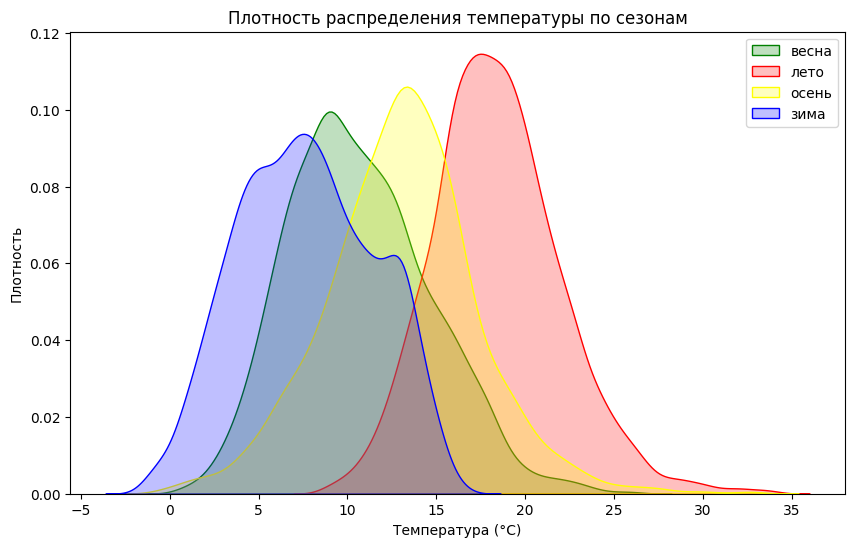

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

season_labels = {0: 'весна', 1: 'лето', 2: 'осень', 3: 'зима'}
season_colors = {0: 'green', 1: 'red', 2: 'yellow', 3: 'blue'}

plt.figure(figsize=(10, 6))
for s in seasons:
    subset = df[df['season'] == s]
    sns.kdeplot(subset['t1'], label=season_labels[s], color=season_colors[s], fill=True)
plt.title('Плотность распределения температуры по сезонам')
plt.xlabel('Температура (°C)')
plt.ylabel('Плотность')
plt.legend()
plt.show()

Графики демонстрируют явное разделение температурных режимов по сезонам. Например, зима характеризуется низкими температурами, а лето – высокими значениями. Это соответствует ожидаемым климатическим условиям.

### Расчёт статистики критерия Колмогорова-Смирнова

Применим **KS-тест** для оценки максимальной разницы между эмпирическими функциями распределения групп.

In [6]:
from scipy.stats import ks_2samp

baseline = df[df['season'] == 1]['t1']
season_labels = {0: 'весны', 1: 'лета', 2: 'осени', 3: 'зимы'}

for s in sorted(df['season'].unique()):
    if s == 1:
        continue
    current = df[df['season'] == s]['t1']
    ks_stat, ks_p = ks_2samp(baseline, current)

    print(f"Значения KS-теста для лета и {season_labels[s]}: статистика {ks_stat:.4f}, p-value {ks_p:.4f}")

Значения KS-теста для лета и весны: статистика 0.6986, p-value 0.0000
Значения KS-теста для лета и осени: статистика 0.5488, p-value 0.0000
Значения KS-теста для лета и зимы: статистика 0.8592, p-value 0.0000


Значения *p-value* критерия Колмогорова-Смирнова равны 0, что подтверждает значительные статистически значимые сдвиги температурных распределений между летним сезоном и остальными. Полученные показатели KS-теста указывают на то, что температурные режимы существенно отличаются, что согласуется с ожидаемыми сезонными изменениями.

## Анализ распределения скорости ветра

### Визуализация плотности распределения

Построим плотности распределения для `wind_speed` по сезонам. Скорость ветра может варьироваться не столь существенно, как температура, однако анализ позволяет выявить возможные сезонные особенности.

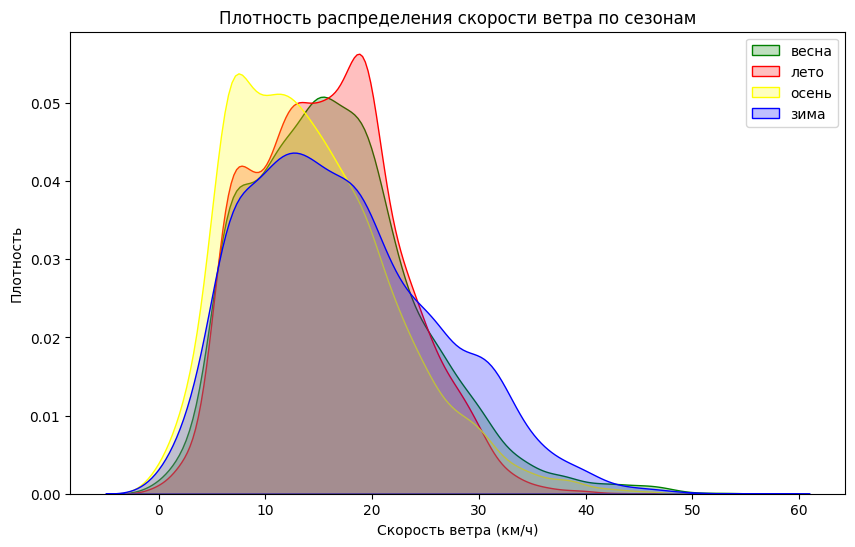

In [7]:
season_labels = {0: 'весна', 1: 'лето', 2: 'осень', 3: 'зима'}
season_colors = {0: 'green', 1: 'red', 2: 'yellow', 3: 'blue'}

plt.figure(figsize=(10, 6))
for s in seasons:
    subset = df[df['season'] == s]
    sns.kdeplot(subset['wind_speed'], label=season_labels[s], color=season_colors[s], fill=True)
plt.title('Плотность распределения скорости ветра по сезонам')
plt.xlabel('Скорость ветра (км/ч)')
plt.ylabel('Плотность')
plt.legend()
plt.show()

Анализ графиков показывает, что распределения скорости ветра между сезонами менее выражены, чем для температуры. Однако небольшие сдвиги могут присутствовать, что требует дальнейшей количественной оценки.

### Расчёт статистики KS-теста и PSI

In [8]:
baseline = df[df['season'] == 1]['wind_speed']
season_labels = {0: 'весны', 1: 'лета', 2: 'осени', 3: 'зимы'}

for s in sorted(df['season'].unique()):
    if s == 1:
        continue
    current = df[df['season'] == s]['wind_speed']
    ks_stat, ks_p = ks_2samp(baseline, current)
    psi_val = psi(baseline.values, current.values)

    print(f"PSI распределений скорости ветра для лета и {season_labels[s]}: {psi_val:.4f}")
    print(f"Значения KS-теста для лета и {season_labels[s]}: статистика {ks_stat:.4f}, p-value {ks_p:.4f}", end="\n\n")

PSI распределений скорости ветра для лета и весны: 0.0768
Значения KS-теста для лета и весны: статистика 0.0411, p-value 0.0012

PSI распределений скорости ветра для лета и осени: 0.1262
Значения KS-теста для лета и осени: статистика 0.1198, p-value 0.0000

PSI распределений скорости ветра для лета и зимы: 0.2042
Значения KS-теста для лета и зимы: статистика 0.1069, p-value 0.0000



Значения **PSI** не превосходят оценку в 0.25, что указывает на умеренную сезонную изменчивость. Однако KS-тест показывает низкие значения *p-value* для уровня значимости в 5%, что говорит о статистической значимости влияния сезонов года на скорость ветра.

## Анализ распределения влажности

### Визуализация плотности распределения

Рассмотрим распределение влажности (`hum`) по сезонам. Построим KDE-графики для оценки различий.

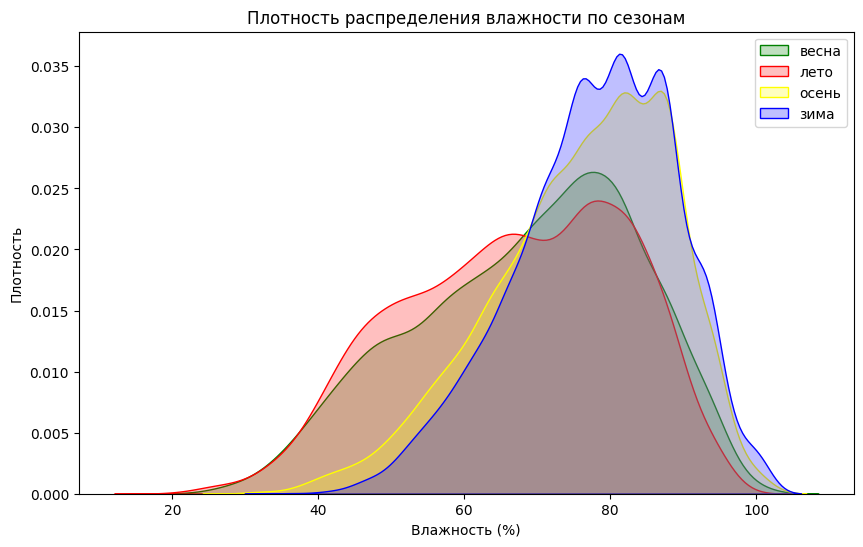

In [9]:
season_labels = {0: 'весна', 1: 'лето', 2: 'осень', 3: 'зима'}
season_colors = {0: 'green', 1: 'red', 2: 'yellow', 3: 'blue'}

plt.figure(figsize=(10, 6))
for s in seasons:
    subset = df[df['season'] == s]
    sns.kdeplot(subset['hum'], label=season_labels[s], color=season_colors[s], fill=True)
plt.title('Плотность распределения влажности по сезонам')
plt.xlabel('Влажность (%)')
plt.ylabel('Плотность')
plt.legend()
plt.show()

Графики распределения влажности показывают различия между сезонами, хотя эти различия могут быть менее заметны, чем по температуре. Тем не менее визуальный анализ демонстрирует, что некоторые сезоны имеют сдвиги в центральных значениях или разбросе.

### Расчёт статистики PSI

In [10]:
baseline = df[df['season'] == 1]['hum']
season_labels = {0: 'весны', 1: 'лета', 2: 'осени', 3: 'зимы'}

for s in sorted(df['season'].unique()):
    if s == 1:
        continue
    current = df[df['season'] == s]['hum']
    psi_val = psi(baseline.values, current.values)

    print(f"PSI распределений количества аренд для лета и {season_labels[s]}: {psi_val:.4f}")

PSI распределений количества аренд для лета и весны: 0.1136
PSI распределений количества аренд для лета и осени: 0.5571
PSI распределений количества аренд для лета и зимы: 1.1087


Результаты **PSI** для влажности подтверждают, что распределения по сезонам отличаются, хотя степень различий варьируется. Значения PSI, превышающие пороговые величины в 0.25, указывают на существенные сдвиги распределений влажности для летнего сезона в сравнении с зимой и осенью.

## Общий вывод

*   **Количество аренд велосипедов**: Значимые сезонные различия наблюдаются в спросе на велосипеды. Лето демонстрирует более высокие значения, а зима – более низкие, что подтверждается как визуально, так и количественными показателями PSI.

*   **Температура воздуха**: Климатические условия, отражённые в температуре, существенно различаются по сезонам, что логично с учётом погодных условий Лондона.

*   **Cкорость ветра**: Сезонные различия присутствуют, но они менее выражены по сравнению с температурой и количеством аренд.

*   **Влажность**: Влажность также показывает сдвиги между сезонами, что может быть важным для моделирования спроса.

Анализ распределений по сезонам показал, что погодные факторы (температура, влажность, скорость ветра) и активность пользователей (количество аренд) изменяются существенно в зависимости от времени года. Полученные результаты могут использоваться для дальнейшего моделирования спроса.

# Проверка гипотез о разнице сегментов

## Анализ гипотезы по разнице медиан распределений количества аренд между зимним сезоном и летним

### Формулировка гипотезы

**Нулевая гипотеза ($H_0$)**:

>   Нет статистически значимой разницы в медианах количества аренд велосипедов между зимним и летним периодами. То есть, разница медиан равна нулю.

**Альтернативная гипотеза ($H_1$)**:

>   Существует статистически значимая разница в медианах количества аренд между зимним и летним сезонами.

### Визуальная оценка

Построим график для визуальной оценки разницы медиан количества аренд велосипедов между зимним и летним периодами.

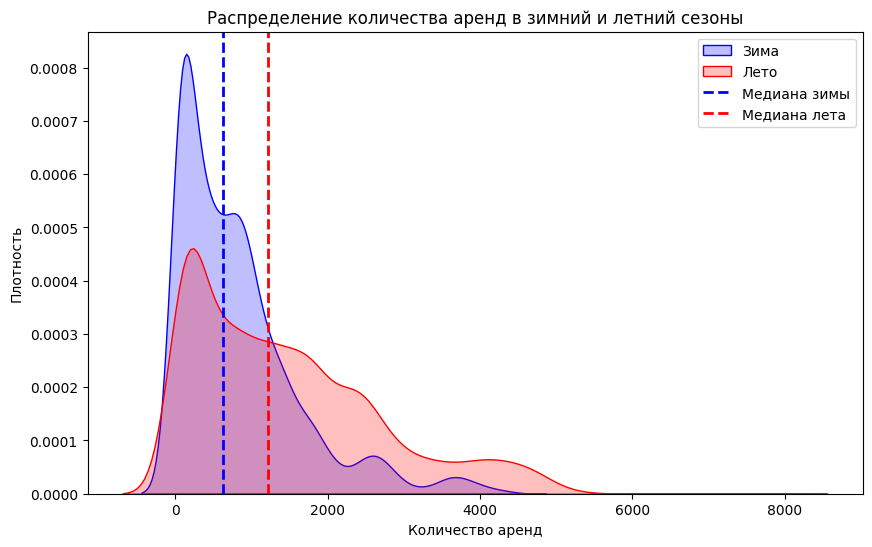

In [11]:
winter_counts = df[df['season'] == 3]['cnt']
summer_counts = df[df['season'] == 1]['cnt']

plt.figure(figsize=(10, 6))

sns.kdeplot(winter_counts, label='Зима', color='blue', fill=True)
sns.kdeplot(summer_counts, label='Лето', color='red', fill=True)

plt.axvline(winter_counts.median(), color='blue', linestyle='--', linewidth=2, label='Медиана зимы')
plt.axvline(summer_counts.median(), color='red', linestyle='--', linewidth=2, label='Медиана лета')

plt.title('Распределение количества аренд в зимний и летний сезоны')
plt.xlabel('Количество аренд')
plt.ylabel('Плотность')
plt.legend()
plt.show()

На графике видно, что медиана распределения количества аренд для летнего сезона значительно смещена вправо. Это может свидетельствовать о наличии статистически значимой разницы.

### Построение точечной и интервальной оценки методом бутстрэпа

Рассчитаем наблюдаемую разницу медиан, а затем получим доверительный интервал через бутстрэп-пересэмплирование.

In [12]:
data_winter = df[df['season'] == 3]['cnt'].values
data_summer = df[df['season'] == 1]['cnt'].values

# Точечная оценка разницы медиан
median_winter = np.median(data_winter)
median_summer = np.median(data_summer)
observed_diff = median_summer - median_winter
print(f"Медиана зимы: {median_winter}, Медиана лета: {median_summer}")
print(f"Наблюдаемая разница (лето - зима): {observed_diff}")

def bootstrap_median_diff(data1, data2, n_iterations=5000):
    boot_diffs = []
    n1, n2 = len(data1), len(data2)
    for _ in range(n_iterations):
        sample1 = np.random.choice(data1, size=n1, replace=True)
        sample2 = np.random.choice(data2, size=n2, replace=True)
        boot_diff = np.median(sample2) - np.median(sample1)
        boot_diffs.append(boot_diff)
    return np.array(boot_diffs)

# Проведение бутстрэпа
boot_diffs = bootstrap_median_diff(data_winter, data_summer, n_iterations=5000)
ci_lower, ci_upper = np.percentile(boot_diffs, [2.5, 97.5])
print(f"95%-й доверительный интервал разницы медиан: [{ci_lower:.2f}, {ci_upper:.2f}]")


Медиана зимы: 632.0, Медиана лета: 1214.0
Наблюдаемая разница (лето - зима): 582.0
95%-й доверительный интервал разницы медиан: [527.00, 638.00]


По результатам бутстрэпа доверительный интервал не включает ноль, что свидетельствует о наличии статистически значимой разницы.

### Проверка гипотезы с помощью непараметрического теста

Для дополнительной проверки разницы применим **тест Манна–Уитни**:

In [13]:
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(data_summer, data_winter, alternative='two-sided')
print(f"Статистика теста Манна-Уитни: {u_stat}")
print(f"p-value: {p_value}")

Статистика теста Манна-Уитни: 12483529.5
p-value: 1.7042249302248384e-142


Значение *p-value* меньше уровня значимости в 5%, это позволяет отвергнуть нулевую гипотезу и заключить, что различие между сезонами статистически значимо.

### Формулировка продуктовых гипотез

Анализ подтверждает, что зимний сезон значительно уступает летнему по количеству аренд, можно сформулировать следующие продуктовые гипотезы и предложения по экспериментации:

1. **Проблемы доступности и комфорта**

    *Гипотеза:* Низкое количество аренд в зимний период связано с ухудшением погодных условий (низкая температура, осадки, сильный ветер), что снижает привлекательность использования велосипедов.

    *Эксперимент:* Провести промо-акции с дополнительными стимулами для аренды (скидки, бонусные баллы), внедрить дополнительные сервисы – например, возможность арендовать утепляющую экипировку вместе с велосипедом.

2. **Сегментация пользователей**

    *Гипотеза:* Зимой арендуют преимущественно пользователи с особыми потребностями (например, сотрудники, которые не имеют альтернативного транспорта), в то время как туристы предпочитают лето.

    *Эксперимент:* Провести опросы пользователей в зимний период, чтобы понять их мотивацию, а также протестировать новые маркетинговые кампании, нацеленные на привлечение других сегментов пользователей (например, агитировать экологичность транспорта с целью привлечения неравнодушных к проблемам загрязнения людей).

3. **Восприятие бренда и сервиса**

    *Гипотеза:* Пользователи могут воспринимать сервис как «сезонный», ассоциируя его исключительно с тёплым временем года.

    *Эксперимент:* Запустить рекламную кампанию, позиционирующую сервис как круглогодичный, с акцентом на удобство, безопасность и дополнительные возможности даже в холодную погоду.

    

### Итоговый вывод

Анализ медианы количества аренд велосипедов между зимним и летним сезонами показывает статистически значимую разницу. Точечная оценка и доверительный интервал, построенный методом бутстрэпа, подтверждают, что летний период характеризуется существенно более высоким спросом. Результаты непараметрического теста дополнительно подтверждают эту разницу (*p-value* < 0.05). Исходя из этого, продуктовые гипотезы сосредоточены на улучшении показателей в зимний период через маркетинговые эксперименты.

## Анализ гипотезы изменения разброса скорости ветра в летний и осенний сезон

Мы проверим гипотезу о том, что сезонные изменения влияют не только на центральную тенденцию, но и на вариативность показателя. В частности, сформулируем гипотезу о том, что разброс скорости ветра в летнем сезоне существенно меньше, чем в осеннем сезоне.

### Формулировка гипотезы

**Нулевая гипотеза ($H_0$)**:

>   Нет разницы в вариативности скорости ветра между летом и осенью, то есть стандартные отклонения в обоих сезонах равны.

**Альтернативная гипотеза ($H_1$)**:

>   Стандартное отклонение скорости ветра летом отличается от стандартного отклонения осенью.

Можно проверить в каком направлении, например, ожидая, что осень имеет большую изменчивость.

### Построение точечной и интервальной оценки методом бутстрэпа

Рассчитаем точечную оценку разницы стандартных отклонений скорости ветра между летом и осенью и получим 95%-ый доверительный интервал через бутстрэп.

In [14]:
data_summer = df[df['season'] == 1]['wind_speed'].values
data_autumn = df[df['season'] == 2]['wind_speed'].values

# Точечная оценка: стандартные отклонения для каждой группы
std_summer = np.std(data_summer, ddof=1)
std_autumn = np.std(data_autumn, ddof=1)
observed_diff = std_autumn - std_summer

print(f"Стандартное отклонение для лета: {std_summer:.3f}")
print(f"Стандартное отклонение для осени: {std_autumn:.3f}")
print(f"Наблюдаемая разница (осень - лето): {observed_diff:.3f}")

def bootstrap_std_diff(data1, data2, n_iterations=5000):
    boot_diffs = []
    n1, n2 = len(data1), len(data2)
    for _ in range(n_iterations):
        sample1 = np.random.choice(data1, size=n1, replace=True)
        sample2 = np.random.choice(data2, size=n2, replace=True)
        boot_std1 = np.std(sample1, ddof=1)
        boot_std2 = np.std(sample2, ddof=1)
        boot_diffs.append(boot_std2 - boot_std1)
    return np.array(boot_diffs)

# Проведение бутстрэпа
boot_diffs = bootstrap_std_diff(data_summer, data_autumn, n_iterations=5000)
ci_lower, ci_upper = np.percentile(boot_diffs, [2.5, 97.5])
print(f"95%-й доверительный интервал разницы стандартных отклонений: [{ci_lower:.3f}, {ci_upper:.3f}]")

Стандартное отклонение для лета: 6.734
Стандартное отклонение для осени: 7.642
Наблюдаемая разница (осень - лето): 0.908
95%-й доверительный интервал разницы стандартных отклонений: [0.680, 1.138]


Выводим график распределения, полученного бутстрэпом.

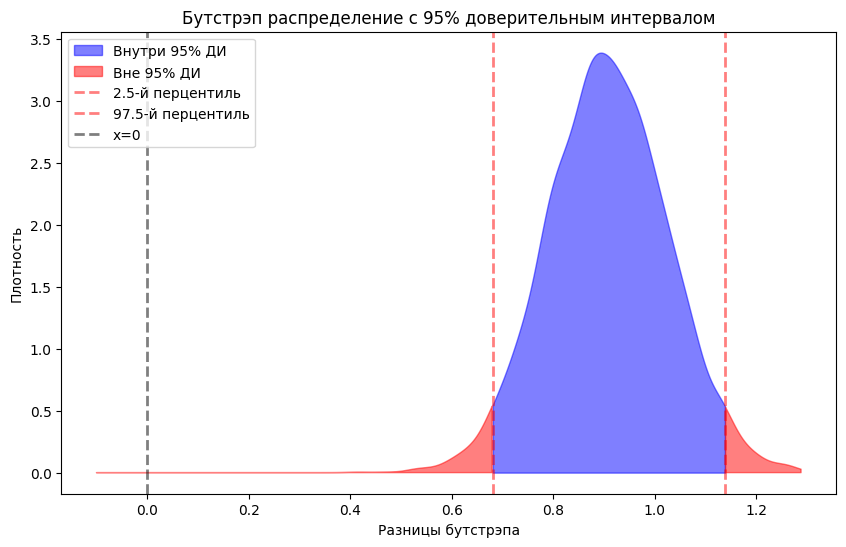

In [15]:
import scipy.stats as stats

x = np.linspace(-0.1, boot_diffs.max(), 1000)
density = stats.gaussian_kde(boot_diffs)(x)

plt.figure(figsize=(10, 6))

plt.fill_between(x, density, where=((x >= ci_lower) & (x <= ci_upper)),
                 color='blue', alpha=0.5, label='Внутри 95% ДИ')
plt.fill_between(x, density, where=((x < ci_lower) | (x > ci_upper)),
                 color='red', alpha=0.5, label='Вне 95% ДИ')

plt.axvline(ci_lower, color='red', linestyle='--', linewidth=2, label='2.5-й перцентиль', alpha=0.5)
plt.axvline(ci_upper, color='red', linestyle='--', linewidth=2, label='97.5-й перцентиль', alpha=0.5)

# Отметим точку 0 на оси x
plt.axvline(0, color='black', linestyle='--', linewidth=2, label='x=0', alpha=0.5)

plt.title("Бутстрэп распределение с 95% доверительным интервалом")
plt.xlabel("Разницы бутстрэпа")
plt.ylabel("Плотность")
plt.legend()
plt.show()


На графике видно, что в 95%-ом доверительном интервале не содержится ноль, поэтому можно сделать вывод о статистически значимой разнице в вариативности скорости ветра между сезонами.

### Статистическая проверка гипотезы тестом Левена

Для дополнительной проверки равенства дисперсий применим тест Левена, который менее чувствителен к отклонениям от нормальности.

In [16]:
from scipy.stats import levene

stat, p_value = levene(data_summer, data_autumn)
print(f"Статистика теста Левена: {stat:.3f}")
print(f"p-value теста Левена: {p_value:.3f}")

Статистика теста Левена: 31.076
p-value теста Левена: 0.000


Тест Левена показал *p-value* меньше уровня значимости в 5%, что позволяет нам отвергнуть нулевую гипотезу о равенстве дисперсий в пользу альтернативы. Также можно сказать, что разброс скорости ветра в осеннем сезоне статистически существенно выше, чем в летнем.

### Формулировка продуктовых гипотез

Так как подтверждается, что осенний сезон характеризуется более высокой изменчивостью скорости ветра, можно выдвинуть следующие продуктовые гипотезы и эксперименты:

1. **Адаптивное планирование логистики**

    *Гипотеза:* Более высокая вариативность скорости ветра осенью негативно влияет на эффективность использования велосипедов (например, за счёт нестабильных условий поездок).

    *Эксперимент:* Провести тестирование изменения распределения велосипедов в зонах с высокой изменчивостью погодных условий. Например, усилить сервис в районах с более стабильными условиями или предоставить пользователям рекомендации по оптимальному маршруту в осенний период.

2. **Обновление сервиса и безопасности**

    *Гипотеза:* Пользователи могут быть менее склонны к аренде велосипедов в осенний период из-за неустойчивых погодных условий и опасений по поводу безопасности.

    *Эксперимент:* Ввести систему оповещений о неблагоприятных погодных условиях, а также предложить дополнительные меры безопасности (например, предоставление защитной экипировки или скидки на использование в неблагоприятных условиях).

3. **Маркетинговые акции с учетом погодных условий**

    *Гипотеза:* Пользователи реагируют на специальные предложения, когда погодные условия менее предсказуемы.

    *Эксперимент:*  Запустить кампанию с динамическими скидками в осенний период, привязывая акции к прогнозам погоды, чтобы стимулировать спрос даже в периоды высокой изменчивости.

### Заключение

Все методы указывают на статистически значимую разницу, поэтому можно сделать вывод, что вариативность скорости ветра осенью существенно отличается от летней. Это может свидетельствовать о более нестабильных погодных условиях в осенний период, что потенциально может влиять на планирование операций сервиса. Поэтому сформулированные продуктовые идеи направлены на оптимизацию работы сервиса в условиях нестабильной погоды.

# Обучение регрессионной модели

## Feature engineering

Изменим названия признаков для большей ясности. Переименуем количество арендованных велосипедов в `count`, температуру воздуха в `temperature`, ощущаемую температуру в `feels-like_temperature`, влажность в `humidity` и код погоды в `weather`.

Также переименуем значения категориальных признаков `season` и `weather`.

In [17]:
df.rename(columns={'cnt': 'count', 't1': 'temperature', 't2': 'feels-like_temperature', 'hum': 'humidity', 'weather_code': 'weather'}, inplace=True)
df['season'] = df['season'].map({0: 'spring', 1: 'summer', 2: 'fall', 3: 'winter'})
df['weather'] = df['weather'].map({1: 'clear', 2: 'scattered clouds', 3: 'broken clouds', 4: 'cloudy', 7: 'rain', 10: 'storm', 26: 'snowfall'})

Добавим новые столбцы с названиями `weekday`, `month`, `hour` в датасет, извлекая данные из существующего столбца `timestamp`. Дадим осмысленные названия месяцам (`month`) и дням недели (`weekday`).

In [18]:
df["month"] = df["timestamp"].apply(lambda x:x.month)
df["weekday"] = df["timestamp"].apply(lambda x:x.weekday())
df["hour"] = df["timestamp"].apply(lambda x:x.hour)
df = df.drop("timestamp", axis=1)

df['month'] = df['month'].map({1: 'january', 2: 'february', 3: 'march', 4: 'april', 5: 'may', 6: 'june', 7: 'july', 8: 'august', 9: 'september', 10: 'october', 11: 'november', 12: 'december'})
df['weekday'] = df['weekday'].map({0: 'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4: 'friday', 5: 'saturday', 6: 'sunday'})
df.head()

,count,temperature,feels-like_temperature,humidity,wind_speed,weather,is_holiday,is_weekend,season,month,weekday,hour
0,182,3.0,2.0,93.0,6.0,broken clouds,0.0,1.0,winter,january,sunday,0
1,138,3.0,2.5,93.0,5.0,clear,0.0,1.0,winter,january,sunday,1
2,134,2.5,2.5,96.5,0.0,clear,0.0,1.0,winter,january,sunday,2
3,72,2.0,2.0,100.0,0.0,clear,0.0,1.0,winter,january,sunday,3
4,47,2.0,0.0,93.0,6.5,clear,0.0,1.0,winter,january,sunday,4


Теперь сравним категориальные признаки. Для этого построим *boxplot*, который покажет распределение количества арендованных велосипедов в сравнении с каждой категорией.

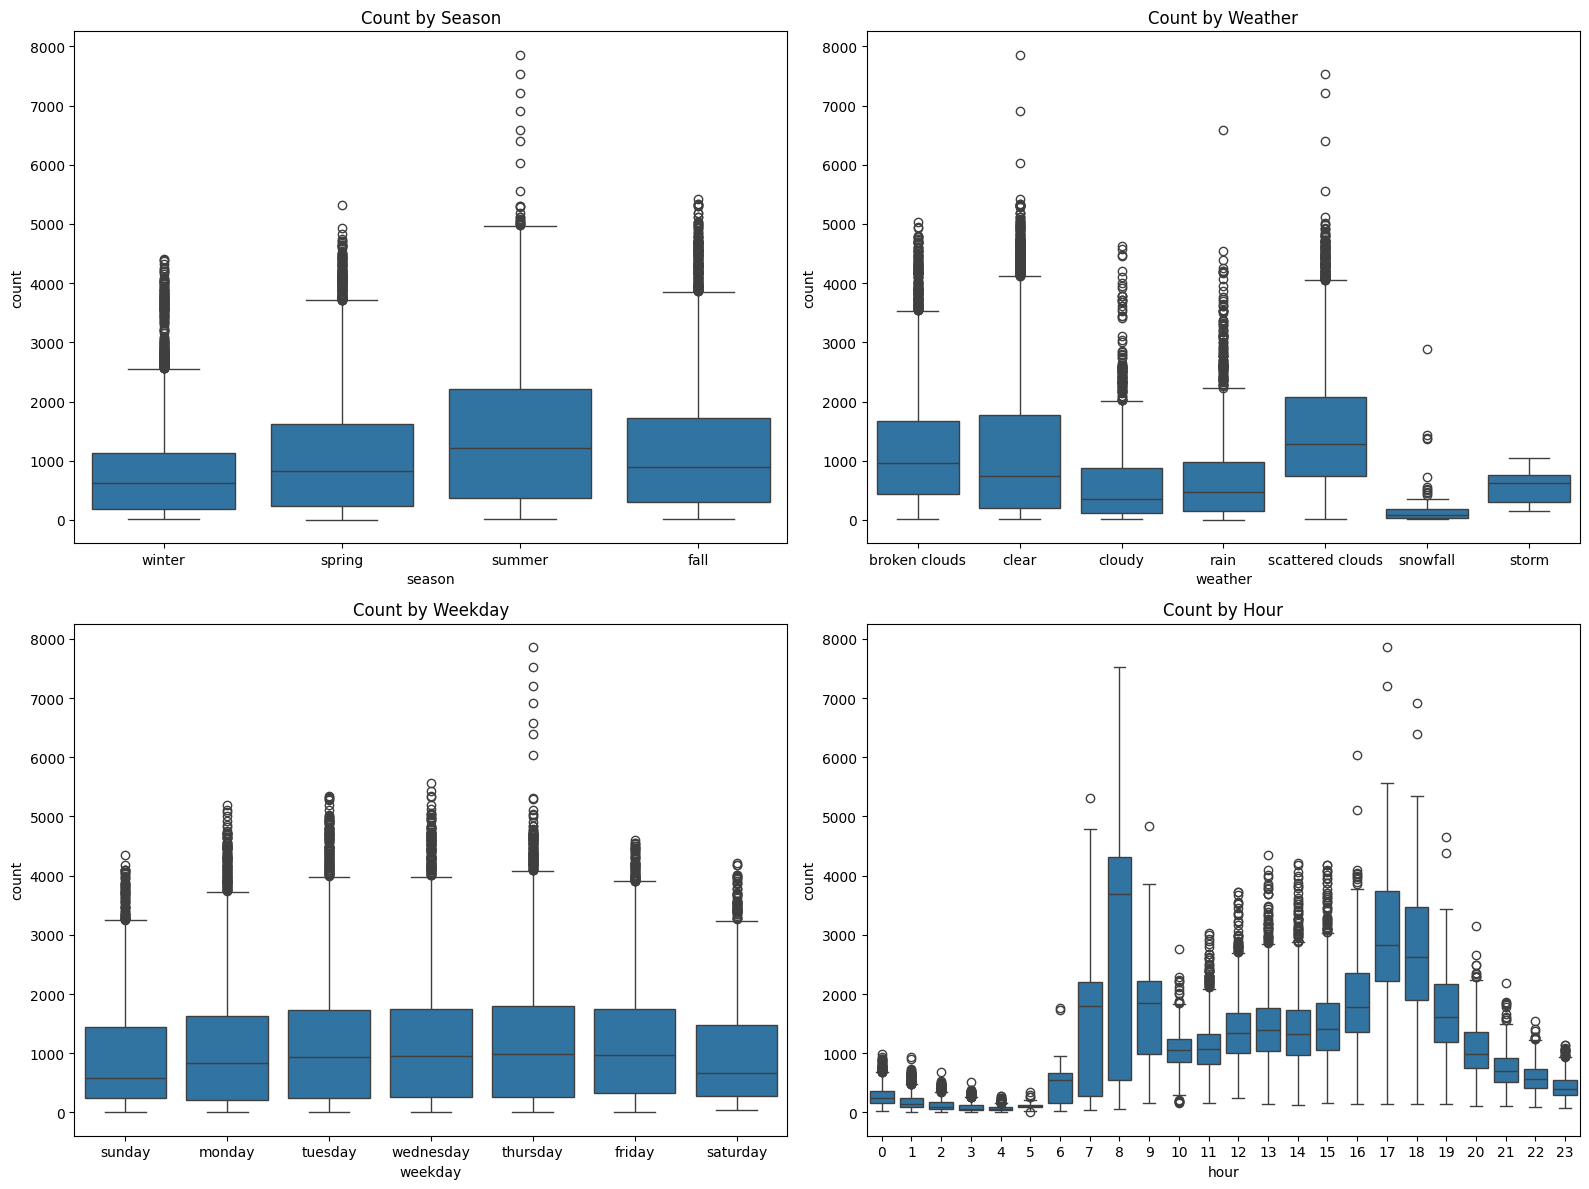

In [19]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.boxplot(x='season', y='count', data=df)
plt.title('Count by Season')

plt.subplot(2, 2, 2)
sns.boxplot(x='weather', y='count', data=df)
plt.title('Count by Weather')

plt.subplot(2, 2, 3)
sns.boxplot(x='weekday', y='count', data=df)
plt.title('Count by Weekday')

plt.subplot(2, 2, 4)
sns.boxplot(x='hour', y='count', data=df)
plt.title('Count by Hour')

plt.tight_layout()
plt.show()

На графике с сезонами года видно, что большее число аренд приходится на лето. Погода также очень влияет на количество аренд. Касательно дней недели различия в распределениях видны только по выходным. Также количество аренд велосипедов очень зависит от времени суток.

Построим *heatmap* для выявления зависимостей между признаками.

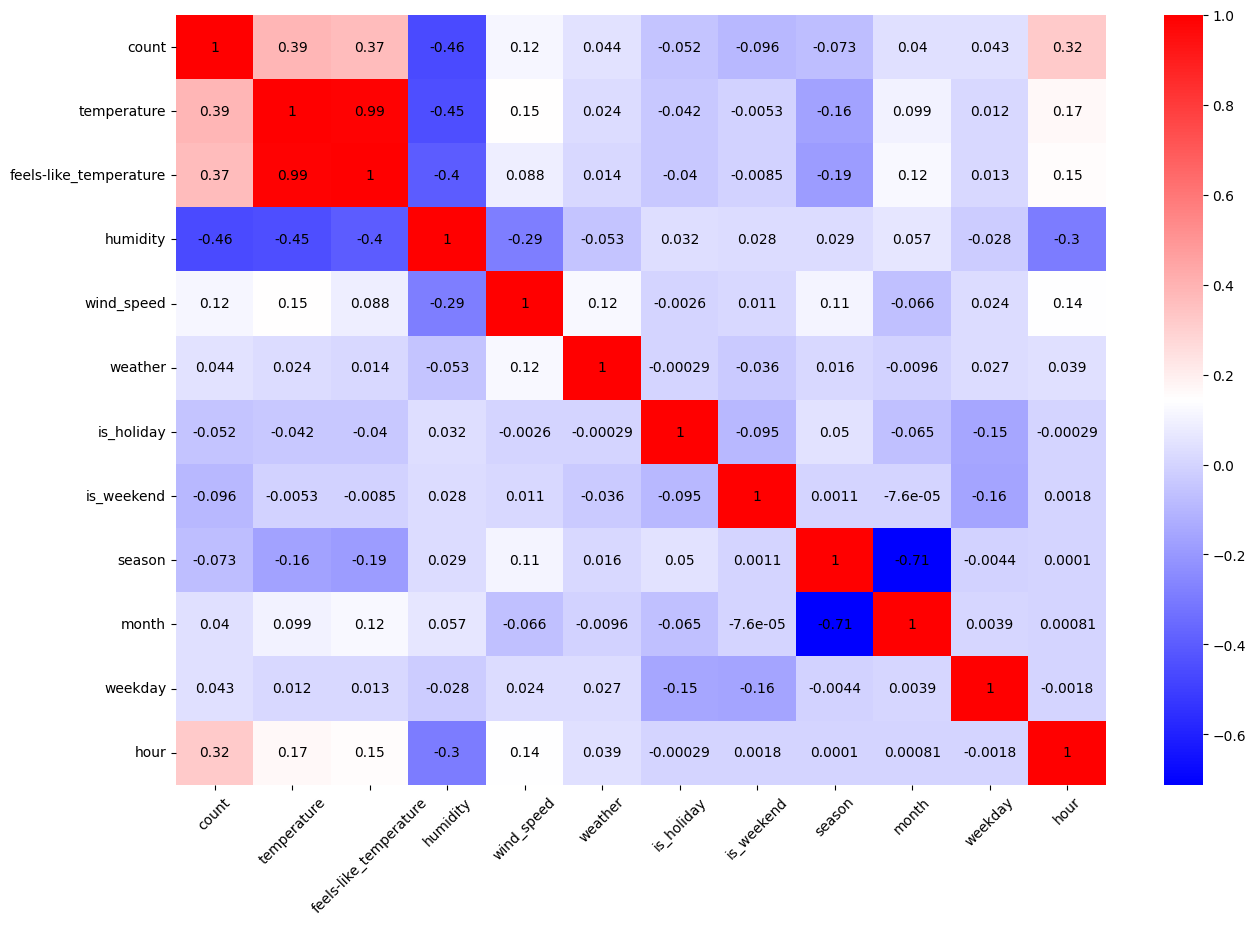

In [20]:
from sklearn.calibration import LabelEncoder

catcol = [col for col in df.columns if df[col].dtype == "object"]
labeled_df = df.copy()
le = LabelEncoder()
for col in catcol:
    labeled_df[col] = le.fit_transform(df[col])

plt.figure(figsize=(15, 10))
ax = sns.heatmap(labeled_df.corr(), cmap='bwr', annot=True, annot_kws={'color': 'black'})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, color='black')
ax.set_yticklabels(ax.get_yticklabels(), color='black')
plt.show()

Видно, что есть очень большая корреляция между признаками `temperature` и `feels-like_temperature`, что, собственно, очевидно. Заметна большая отрицательная корреляция между `season` и `month`.

Из-за высокой корреляции далее для построения модели будем использовать только признак `temperature`. Из признаков `season` и `month` исключим информацию о месяцах, чтобы сократить количество ненужных регрессоров.

In [21]:
df.drop(['feels-like_temperature', 'month'],  axis=1, inplace=True)

Закодируем категориальные признаки с помощью **one hot encoding**.

In [22]:
df = pd.get_dummies(data=df, columns=["season", "hour", "weather", "weekday"], drop_first=True, dtype=int)

Посмотрим на наличие выбросов в признаках.

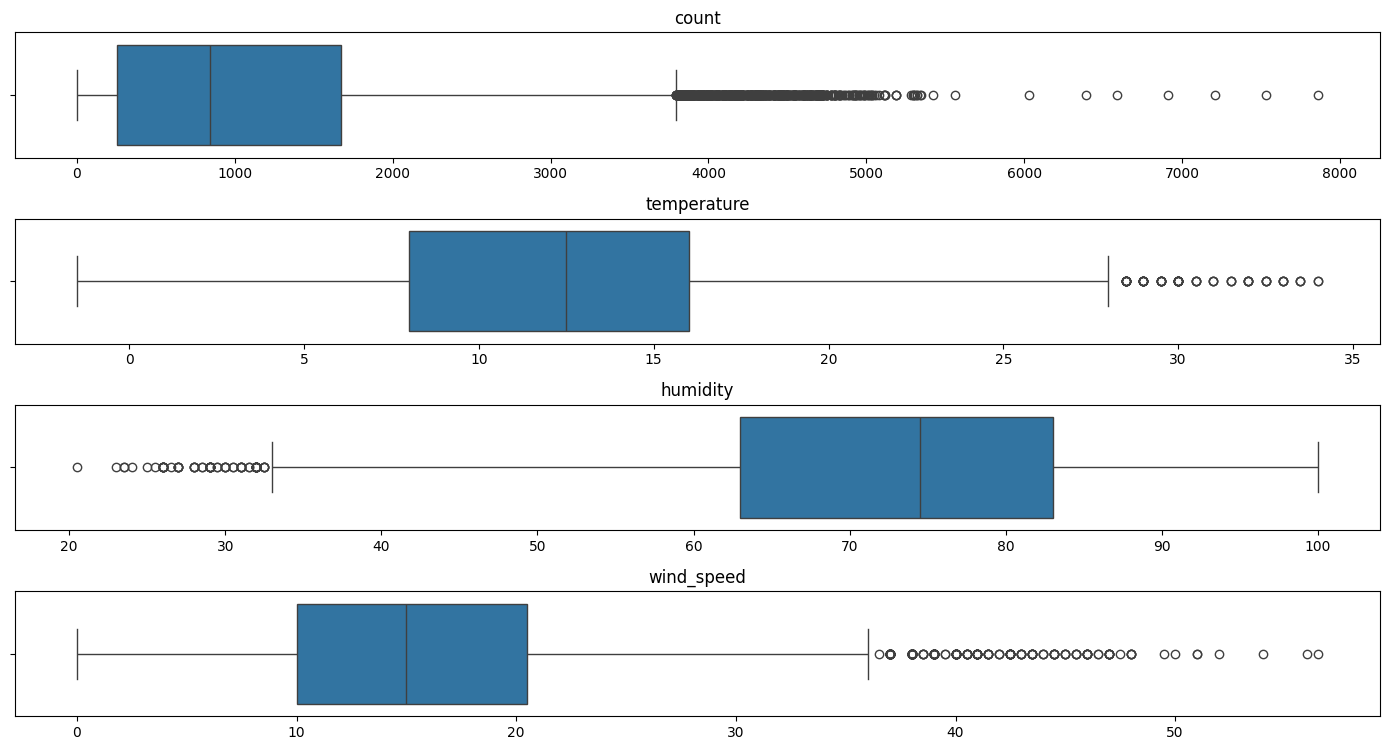

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ["count", "temperature", "humidity", "wind_speed"]

fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(14, 8))

for ax, feature in zip(axes, features):
    sns.boxplot(x=df[feature], ax=ax, orient="h")
    ax.set_title(f"{feature}")
    ax.set_xlabel("")
    ax.set_ylabel("")  # Убираем подпись оси y для чистоты графика

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

На графике видно огромное количество выбросов для количества аренд велосипедов.

Удалим все выбросы этого признака по методу межквартильного размаха.

In [24]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

last_count = df['count']
df = remove_outliers(df, 'count')

Сравним распределение количества аренд велосипедов до и после удаления выбросов.

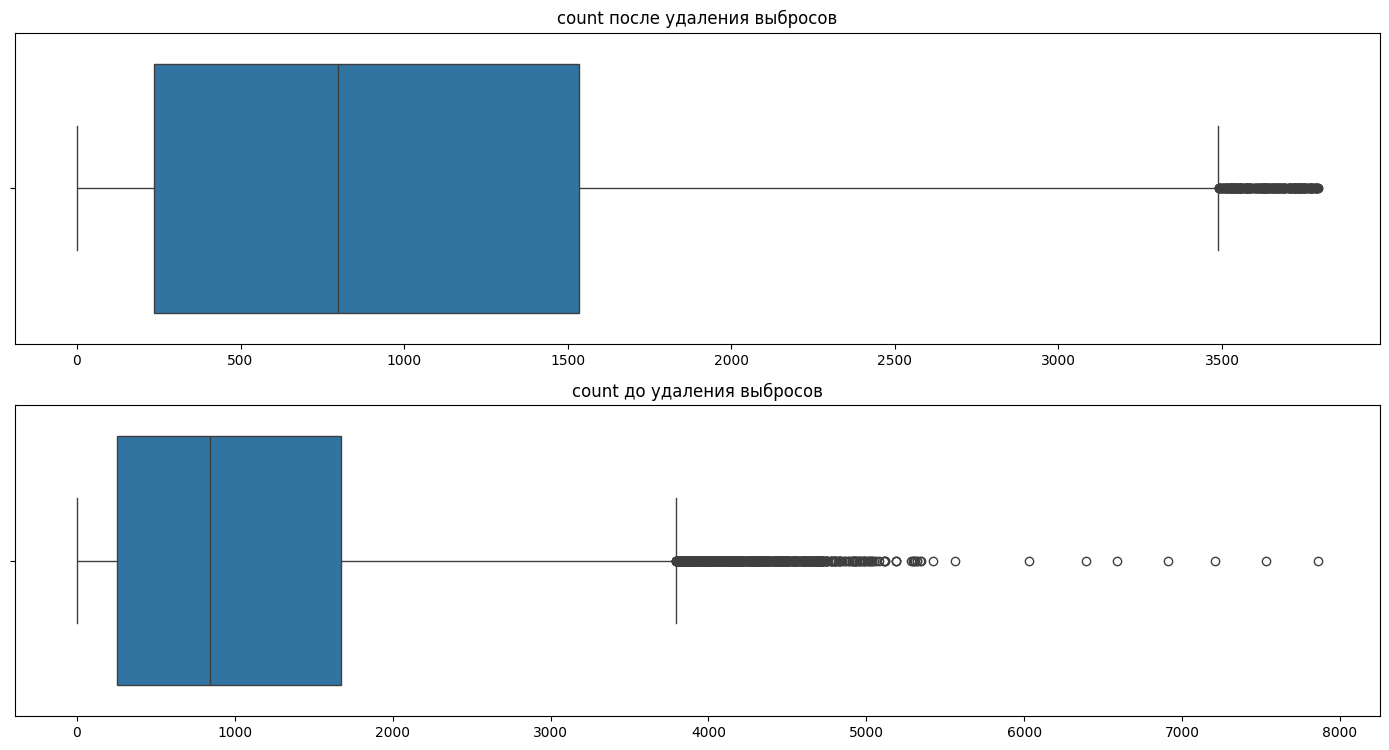

In [25]:
_, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))

sns.boxplot(x=df['count'], ax=axes[0], orient="h")
axes[0].set_title(f"count после удаления выбросов")
axes[0].set_xlabel("")
axes[0].set_ylabel("")

sns.boxplot(x=last_count, ax=axes[1], orient="h")
axes[1].set_title(f"count до удаления выбросов")
axes[1].set_xlabel("")
axes[1].set_ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Видно, что количество выбросов у признака сократилось и распределение стало более сбалансировано.

## Построение первоначальной модели

Разделив выборку на 80% и 20%, мы получим обучающую и тестовую выборки. Обучающая выборка будет использоваться для обучения модели, а тестовая выборка - для ее оценки.

Обучим первоначальную модель.

In [26]:
import statsmodels.api as sm

X = df.drop(['count'], axis=1)
y = df['count']

X = sm.add_constant(X)
lm = sm.OLS(y, X).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     927.6
Date:                Mon, 31 Mar 2025   Prob (F-statistic):               0.00
Time:                        02:59:33   Log-Likelihood:            -1.2732e+05
No. Observations:               16739   AIC:                         2.547e+05
Df Residuals:                   16696   BIC:                         2.551e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Коэффициенты в модели говорят, насколько изменится количество арендованных велосипедов при увеличении соответствующего фактора на единицу при фиксированном значении остальных факторов. Например, коэффициент при независимой переменной температуры положителен и статистически значим, следовательно увеличение температуры на $1 \degree \mathrm{C}$ (при прочих равных условиях) связано с увеличением количества аренд велосипедов на величину, равную оцененному коэффициенту, а именно на $\approx 31$.

## Тестирование первоначальной модели

Проведём визуальный анализ остатков, чтобы проверить их распределение на нормальность.

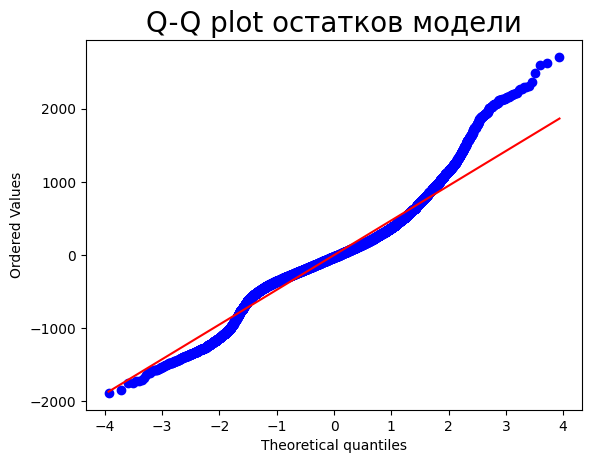

In [27]:
from scipy import stats

y_pred = lm.predict(X)

stats.probplot((y - y_pred), plot= plt, dist="norm")
plt.title('Q-Q plot остатков модели', fontsize = 20)
plt.show()

Уже визуально видно, что распределение остатков модели на нормальное не похоже. Правый хвост распределения остатков оказался более тяжёлым, чем у нормального распределения.

Проведём тест **Бройша-Пагана** для тестирования модели на гетероскедастичность. Если p‑value теста меньше уровня значимости в 5%, значит, предположение о постоянной дисперсии нарушается.

In [28]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(lm.resid, lm.model.exog)
bp_labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
bp_df = pd.DataFrame(list(zip(bp_labels, bp_test)))
print("Тест Бройша-Пагана:\n")
print(bp_df.to_string(index=False, header=False))

Тест Бройша-Пагана:

   LM Statistic 7887.959484
LM-Test p-value    0.000000
    F-Statistic  354.269275
 F-Test p-value    0.000000


Тест Бройша‑Пагана выявил значимую гетероскедастичность (p‑value < 0.05).

Проверим признаки на мультиколлинеарность. Для численного анализа вычисляют индекс VIF (Variance Inflation Factor) для каждой фичи. VIF дает базовое количественное представление о том, насколько переменные характеристики коррелируют друг с другом. Если VIF превышает значение в 5–10, это свидетельствует о проблемной мультиколлинеарности.

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X.drop('const', axis=1, inplace=True)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

c:\Users\vlad2\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



                     feature        VIF
0                temperature  12.792651
1                   humidity  19.408083
2                 wind_speed   5.874073
3                 is_holiday   1.114672
4                 is_weekend        inf
5              season_spring   2.093346
6              season_summer   2.589478
7              season_winter   2.602427
8                     hour_1   1.867642
9                     hour_2   1.869723
10                    hour_3   1.877204
11                    hour_4   1.882767
12                    hour_5   1.886172
13                    hour_6   1.887047
14                    hour_7   1.872543
15                    hour_8   1.473113
16                    hour_9   1.840284
17                   hour_10   1.826782
18                   hour_11   1.840034
19                   hour_12   1.836309
20                   hour_13   1.825774
21                   hour_14   1.827329
22                   hour_15   1.825850
23                   hour_16   1.820425


Исключим из модели признаки `weekday_saturday` и `weekday_sunday`, так как они идентичны признаку `is_weekend`, который показывает, является ли день выходным.

## Эволюция модели

Удаляем из модели признаки `weekday_saturday` и `weekday_sunday`.

In [30]:
X.drop(['weekday_saturday', 'weekday_sunday'],  axis=1, inplace=True)

Обучаем модель с учётом изменений.

In [31]:
X = sm.add_constant(X)
lm = sm.OLS(y, X).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     949.7
Date:                Mon, 31 Mar 2025   Prob (F-statistic):               0.00
Time:                        02:59:42   Log-Likelihood:            -1.2732e+05
No. Observations:               16739   AIC:                         2.547e+05
Df Residuals:                   16697   BIC:                         2.551e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Удалим статистически незначимые признаки из модели.

In [32]:
X.drop(['season_spring', 'season_summer', 'weather_cloudy', 'weather_clear', 'weather_snowfall', 'weekday_tuesday', 'weekday_thursday', 'weekday_wednesday', 'weekday_monday', 'hour_1', 'const'],  axis=1, inplace=True)

In [33]:
X = sm.add_constant(X)
lm = sm.OLS(y, X).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     1254.
Date:                Mon, 31 Mar 2025   Prob (F-statistic):               0.00
Time:                        02:59:42   Log-Likelihood:            -1.2734e+05
No. Observations:               16739   AIC:                         2.547e+05
Df Residuals:                   16707   BIC:                         2.550e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Оценим VIF и исключим из модели признаки с высокой корреляцией.

In [34]:
X.drop('const', axis=1, inplace=True)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                     feature        VIF
0                temperature   7.507139
1                   humidity  12.204186
2                 wind_speed   5.392395
3                 is_holiday   1.037444
4                 is_weekend   1.448511
5              season_winter   1.901564
6                     hour_2   1.442805
7                     hour_3   1.447636
8                     hour_4   1.450056
9                     hour_5   1.454187
10                    hour_6   1.459417
11                    hour_7   1.452069
12                    hour_8   1.251324
13                    hour_9   1.442566
14                   hour_10   1.441637
15                   hour_11   1.458045
16                   hour_12   1.458877
17                   hour_13   1.453575
18                   hour_14   1.454801
19                   hour_15   1.451273
20                   hour_16   1.442744
21                   hour_17   1.327726
22                   hour_18   1.344485
23                   hour_19   1.422263


Удалим из модели признак `humidity`, так как ещё на корреляционной матрице мы видели, что он имеет высокую корреляцию с признаками температуры воздуха и скорости ветра. Из этого можно сделать предположение, что его удаление также стабилизирует показатели VIM у `temperature` и `wind_speed`.

Также удалим признаки `season_winter` и `hour_2` из-за их корреляции с температурой.

In [35]:
X.drop(['humidity', 'season_winter', 'hour_2'],  axis=1, inplace=True)

In [36]:
X = sm.add_constant(X)
lm = sm.OLS(y, X).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     1279.
Date:                Mon, 31 Mar 2025   Prob (F-statistic):               0.00
Time:                        02:59:45   Log-Likelihood:            -1.2781e+05
No. Observations:               16739   AIC:                         2.557e+05
Df Residuals:                   16710   BIC:                         2.559e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Посмотрим, как изменились показатели VIM.

In [37]:
X.drop('const', axis=1, inplace=True)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                     feature       VIF
0                temperature  4.932896
1                 wind_speed  4.698543
2                 is_holiday  1.031427
3                 is_weekend  1.413195
4                     hour_3  1.153174
5                     hour_4  1.149352
6                     hour_5  1.146953
7                     hour_6  1.155577
8                     hour_7  1.168027
9                     hour_8  1.108964
10                    hour_9  1.225477
11                   hour_10  1.255827
12                   hour_11  1.293254
13                   hour_12  1.308064
14                   hour_13  1.311044
15                   hour_14  1.316062
16                   hour_15  1.311839
17                   hour_16  1.301029
18                   hour_17  1.198389
19                   hour_18  1.200179
20                   hour_19  1.248462
21                   hour_20  1.226450
22                   hour_21  1.205680
23                   hour_22  1.190550
24                   hour

Теперь индексы VIF для каждого признака находятся на приемлемом уровне и метрика $Adj. \; R^2$ практически не пострадала.

## Тестирование итоговой модели

Разобъём выборку на обучающий и тестовый наборы.

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=95)

Обучим модель на **train** наборе.

In [39]:
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     1021.
Date:                Mon, 31 Mar 2025   Prob (F-statistic):               0.00
Time:                        02:59:47   Log-Likelihood:            -1.0226e+05
No. Observations:               13391   AIC:                         2.046e+05
Df Residuals:                   13362   BIC:                         2.048e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Проведём предсказания на тестовом наборе.

In [40]:
X_test = sm.add_constant(X_test)
y_pred = lm.predict(X_test)

Найдём значение  $Adj. \; R^2$ для тестового набора.

In [41]:
from sklearn.metrics import r2_score

print("R-Squared: ", r2_score(y_test, y_pred))
print("Adj. R-Squared: ", 1 - (1 - r2_score(y_test, y_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

R-Squared:  0.683265576866569
Adj. R-Squared:  0.6804972530959634


Метрика $R^2$ оказывает, какая доля дисперсии зависимой переменной объясняется предикторами модели. Если $R^2$ равен 0.68, это значит, что 68% наблюдаемой изменчивости признака `count` можно объяснить моделью, а остальные 32% обусловлены факторами, не учтенными в модели или случайными ошибками. $Adj. \; R^2$ учитывает количество регрессоров и даёт корректированную оценку, что особенно полезно при сравнении моделей с разным числом факторов.

Посмотрим на график предсказаний, которые дала модель, в сравнении с фактическими значениями арендованных велосипедов.

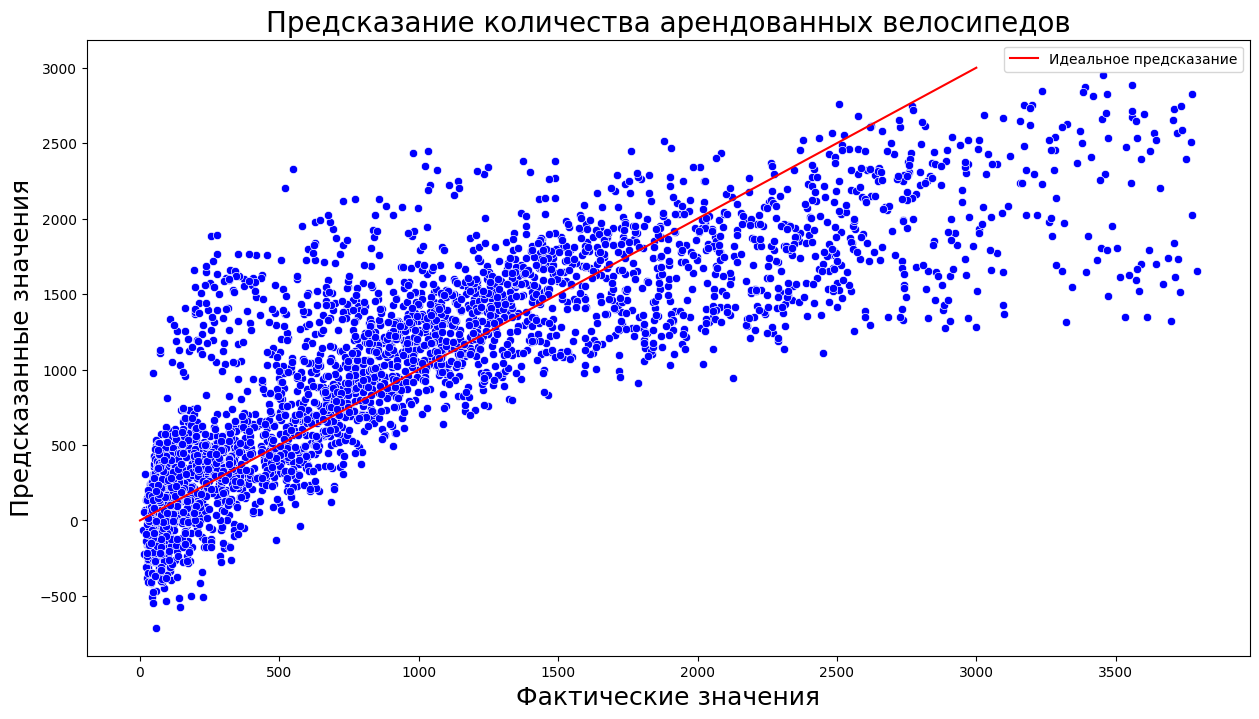

In [42]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=y_test, y=y_pred, color="blue")

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([0, 3000], [0, 3000], color='red',  label='Идеальное предсказание')

plt.title('Предсказание количества арендованных велосипедов', fontsize=20)
plt.xlabel('Фактические значения', fontsize=18)
plt.ylabel('Предсказанные значения', fontsize=18)
plt.legend()
plt.show()

Видим, что диагональный тренд предсказаний присутствует, но многие значения далеки от истины и модель предсказывает большое количество аренд меньше $0$.

Посмотрим на график остатков модели для тестовой выборки, чтобы проверить наличие гетероскедастичности.

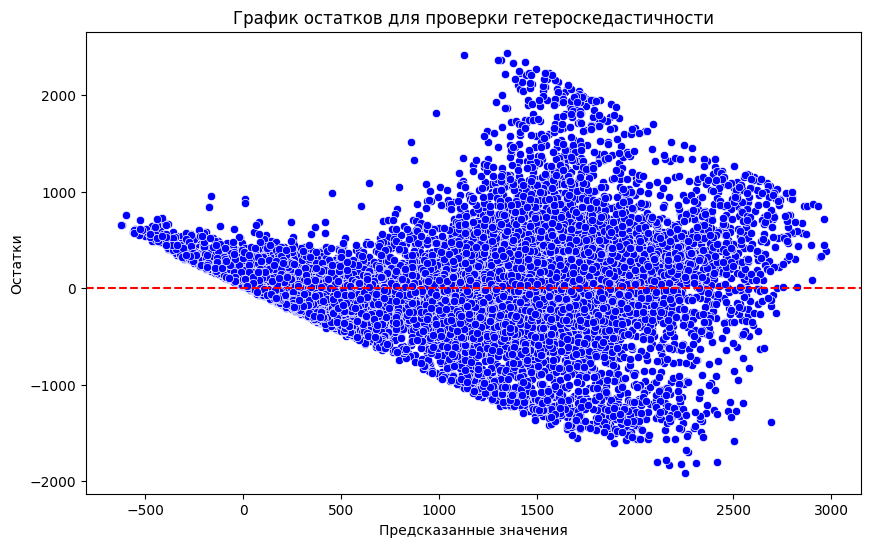

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=lm.fittedvalues, y=lm.resid, color="blue")
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("График остатков для проверки гетероскедастичности")
plt.show()

Видна явная гетероскедастичность)

Даже статистическими тестами проверять не надо. Применение робастых стандартных ошибок не дало никаких результатов. Скорее всего, отношение между предикторами и зависимой переменной может быть нелинейным, а линейная модель не способна адекватно учесть изменяющийся разброс ошибки.

Можно попробовать оценивать модель через другую loss-функцию, например использовать метод взвешивания Weighted Least Squares.

## Выводы

Модель в текущем виде объясняет около 68% изменчивости целевой переменной, однако наблюдаются нарушения предпосылок, а именно большая гетероскедастичность.

Для данной задачи можно попробовать использовать модели нелинейного характера, например, деревья решений или ансамблевые методы (Random Forest, Gradient Boosting), которые могут лучше уловить сложные зависимости.

# Заключение

В ходе проведённого исследования по анализу данных сервиса велосипедного шеринга в Лондоне были достигнуты следующие результаты, позволяющие глубже понять факторы, влияющие на спрос, и выработать практические рекомендации для оптимизации работы сервиса.

На **первоначальном этапе** посредством визуального анализа распределений признаков и применения статистических мер удалось выявить характерные **особенности данных**. Было обнаружено, что показатели количества аренд, температуры, скорости ветра и влажности демонстрируют ярко выраженные **сезонные изменения**. Эти различия позволили сегментировать данные, выявить статистически значимые **сдвиги распределений** между группами и сформулировать **гипотезы** о влиянии погодных условий и временных факторов на спрос. Применение метода **бутстрэпа** для построения доверительных интервалов дало возможность **оценить надежность** обнаруженных различий, а **тестирование гипотез** позволило сделать обоснованные выводы о наличии или отсутствии статистически значимых различий между сегментами.

На основе статистического анализа были выдвинуты **продуктовые гипотезы**, направленные на **объяснение отставания** тех групп, которые демонстрировали менее благоприятные показатели. Эти гипотезы стали отправной точкой для разработки возможных **экспериментов** и маркетинговых **стратегий**, направленных на **повышение спроса** в отстающих сегментах. Такой подход демонстрирует, как аналитическая работа может быть непосредственно связана с практическими рекомендациями для бизнеса.

Вторая часть исследования была посвящена **построению модели** линейной регрессии методом МНК с целью прогнозирования количества аренд велосипедов. Вначале была **оценена промежуточная модель**, включающая базовые погодные показатели, что позволило выявить существенное влияние температуры, скорости ветра и влажности на спрос. Однако диагностика модели выявила **нарушения предпосылок** классической линейной регрессии – наличие гетероскедастичности и признаки мультиколлинеарности, что могло негативно сказываться на надёжности оценок коэффициентов.

В ответ на выявленные проблемы была построена **финальная спецификация модели**. Сравнительный анализ между промежуточными и финальной моделями, с использованием метрик $Adj. \; R^2$ и VIM, продемонстрировал, что финальная модель обладает **меньшей корреляцией** признаков и **более стабильной интерпретацией** влияния отдельных факторов.

Таким образом, проведённое исследование позволило не только выявить ключевые **зависимости** между погодными условиями, сезонностью и спросом на сервис велосипедного шеринга, но и продемонстрировать **практический подход** к **диагностике** и **корректировке** моделей линейной регрессии. Полученные результаты подтверждают **значимость комплексного анализа**, включающего как статистическое тестирование гипотез, так и построение прогностических моделей, что в совокупности даёт возможность выработать обоснованные **рекомендации** для дальнейшего развития и оптимизации сервиса. Эти выводы могут стать основой для разработки стратегий, направленных на **повышение эффективности** работы сервиса в условиях сезонных колебаний спроса и изменчивых погодных условий.